In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('ИТОГОВЫЙ data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [7]:
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [10]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [36]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [38]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [40]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [42]:
grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


In [44]:
print(grouped_df.shape)

(205, 2)


Нарисуйте график продаж у `grouped_df`

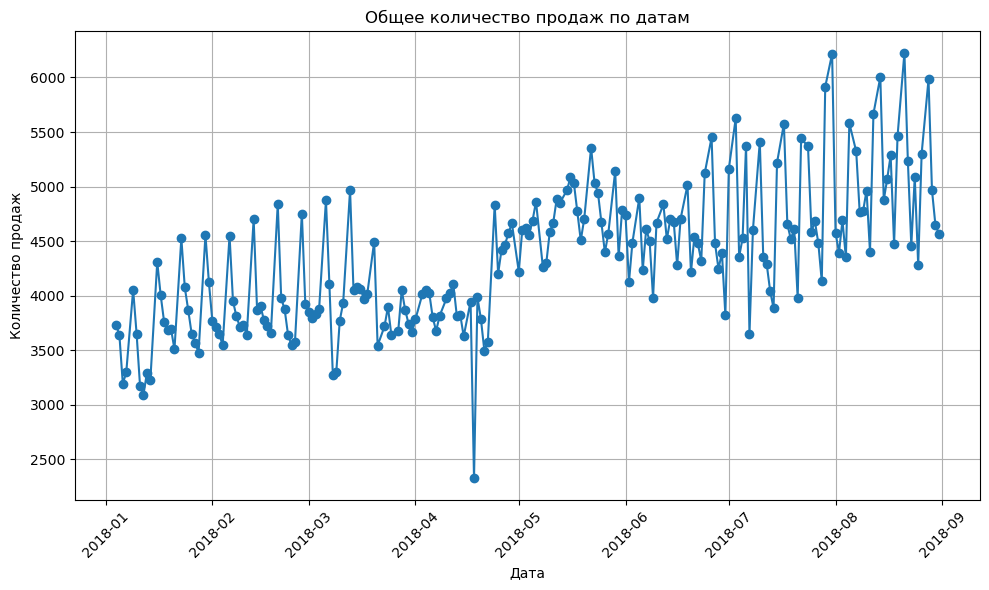

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Общее количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)  
plt.grid()
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике представлено общее количество продаж по датам.
Ось X показывает даты с января по август 2018 года.
Ось Y показывает количество продаж. Значения варьируются от 2500 до 6000 единиц.
Наибольшее количество продаж было зафиксировано в августе 2018 г. примерно от 6500 ед.
Минимальное значение зафиксировано в середине апреля 2018 г. и примерно составляет 1500 ед.
С января по март 2018 г. можем наблюдать увеличение роста продаж.
После с марта по середину апреля 2018 наблюдается некоторый спад.
В промежутке с мая по сентрябрь 2018 г.наблюдается рост в продажах, с небольшими колебаниями.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [60]:
df['z_score'] = (df['Количество'] - df['Количество'].mean()) / df['Количество'].std()

In [62]:
max_outlier_row = df.loc[df['z_score'].abs().idxmax()]

In [64]:
max_outlier_row

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
z_score                    65.72326
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [32]:
filtered_df = df[(df['Дата'].dt.dayofweek == 2) & 
                  (df['Дата'].dt.month.isin([6, 7, 8])) &
                  (df['Склад'].isin([1, 2, 3]))]

In [39]:
top_sales = filtered_df.groupby('Номенклатура', as_index=False)['Количество'].sum()

In [41]:
print(top_sales)

   Номенклатура  Количество
0     product_0        5537
1     product_1        8135
2    product_10         370
3    product_11         303
4    product_12         281
5    product_13         673
6    product_14         289
7    product_15         638
8    product_16          70
9    product_17         727
10   product_18         459
11   product_19         377
12    product_2        7448
13   product_20         234
14   product_21         227
15   product_22        1443
16   product_23         281
17    product_3        4035
18    product_4        1855
19    product_5        1730
20    product_6        1927
21    product_7         284
22    product_8         282


In [43]:
top_product = top_sales.loc[top_sales['Количество'].idxmax()]

In [45]:
top_product 

Номенклатура    product_1
Количество           8135
Name: 1, dtype: object

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [47]:
unique_dates = df['Дата'].unique()

In [49]:
unique_dates

<DatetimeArray>
['2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-09 00:00:00', '2018-01-10 00:00:00',
 '2018-01-11 00:00:00', '2018-01-12 00:00:00', '2018-01-13 00:00:00',
 '2018-01-14 00:00:00',
 ...
 '2018-08-21 00:00:00', '2018-08-22 00:00:00', '2018-08-23 00:00:00',
 '2018-08-24 00:00:00', '2018-08-25 00:00:00', '2018-08-26 00:00:00',
 '2018-08-28 00:00:00', '2018-08-29 00:00:00', '2018-08-30 00:00:00',
 '2018-08-31 00:00:00']
Length: 205, dtype: datetime64[ns]

In [11]:
df1 = pd.read_csv('Погода Астана.csv')

In [7]:
df1.head()

,Дата;Время;T
0,31.08.2018;23:00:00;8.20
1,31.08.2018;20:00:00;9.60
2,31.08.2018;17:00:00;11.30
3,31.08.2018;14:00:00;12.30
4,31.08.2018;11:00:00;13.20


In [87]:
print(df1.dtypes)

Дата;Время;T    object
dtype: object


In [17]:
df1 = pd.read_csv('Погода Астана.csv', sep=';')
df1.head()

,Дата,Время,T
0,31.08.2018,23:00:00,8.2
1,31.08.2018,20:00:00,9.6
2,31.08.2018,17:00:00,11.3
3,31.08.2018,14:00:00,12.3
4,31.08.2018,11:00:00,13.2


In [21]:
print(df1.dtypes)

Дата      object
Время     object
T        float64
dtype: object


In [25]:
df1['Дата'] = pd.to_datetime(df1['Дата'], dayfirst=True)

In [27]:
df1_daily_temp = df1.groupby('Дата').agg(avg_temp=('T', 'mean')).reset_index()

In [29]:
df1_daily_temp.head()

,Дата,avg_temp
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [46]:
merged_df = pd.merge(grouped_df, df1_daily_temp, left_on='Дата', right_on='Дата', how='inner')

In [48]:
merged_df.head()

,Дата,Количество,avg_temp
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


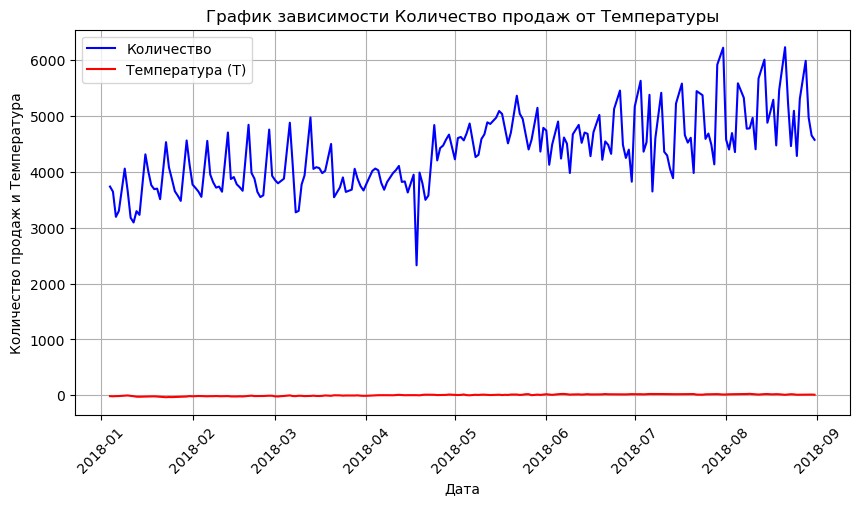

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество', color='b')
plt.plot(merged_df['Дата'], merged_df['avg_temp'], label='Температура (T)', color='r')
plt.xlabel('Дата')
plt.ylabel('Количество продаж и Температура')
plt.title('График зависимости Количество продаж от Температуры')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

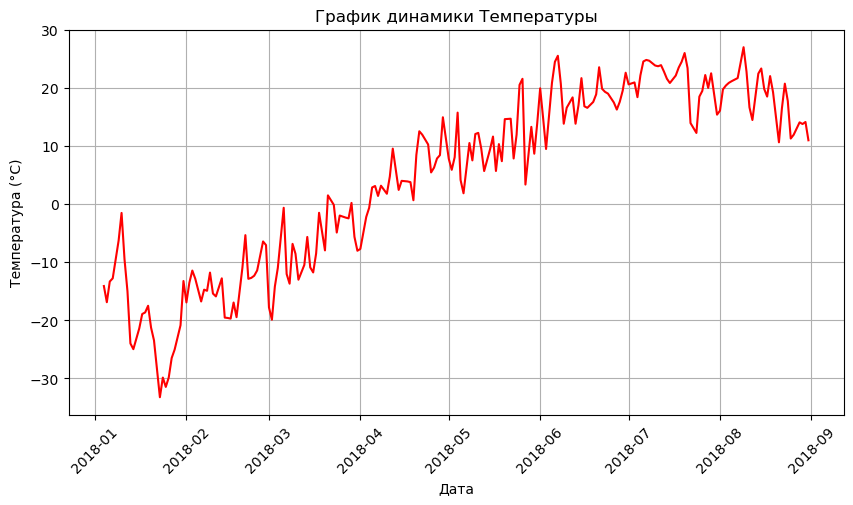

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Дата'], merged_df['avg_temp'], label='Температура', color='r')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('График динамики Температуры')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()